In [2]:
import matplotlib.font_manager as fm

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


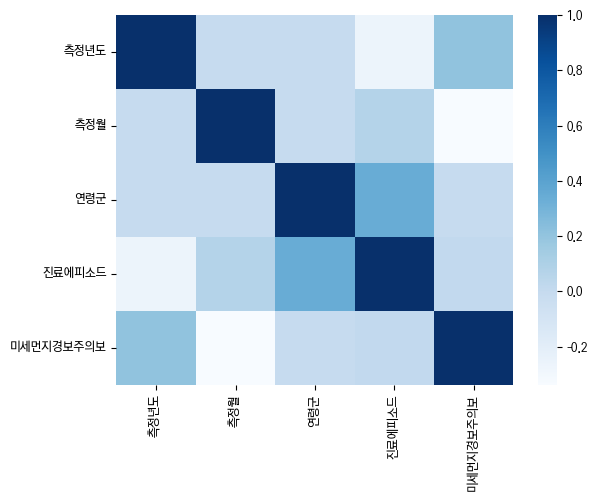

In [4]:
pd.set_option('display.width', 170)
# 데이터들을 전부 보기 위해 row, col 생략 없이 출력하도록 하였으며 데이터가 항상 float 형식으로 소수점 이하 6자리까지 출력되도록 하였습니다.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format
df = pd.read_csv("[2016-2021]PM경보주의보.csv")
# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)    
plt.rcParams['font.family'] = 'LG PC'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [12]:
cor_target_abs2 = abs(cor['진료에피소드']).sort_values(ascending=False).iloc[1:6]
print(cor_target_abs2)
#cor_target_abs2 = abs(cor['미세먼지경보주의보']).sort_values(ascending=False).iloc[1:6]
#print(cor_target_abs2)

연령군         0.343086
측정년도        0.262625
측정월         0.072574
미세먼지경보주의보   0.015176
Name: 진료에피소드, dtype: float64


In [13]:
cor_target_features = cor_target_abs2.index.tolist()
#모델 만들기
# 3-1. 기대 수명을 예측하는 선형 회귀 모델을 만들어보자. 상관계수가 높았던 5개 특징을 선형 회귀 모델의 입력 X로 정의하자

from sklearn.linear_model import LinearRegression

# 입력 변수와 출력 변수 정의(상관계수가 높았던 5개 특징을 선형 회귀 모델의 입력 X로 정의, 예측할 'Life expectancy' y로 정의)
# 결측데이터를 제거한 데이터 사용
X = df[cor_target_features]
y = df['진료에피소드']

# 3-2. 훈련용과 테스트용 데이터로 분리한다. test_size=.33, random_state=42로 설정한다
# r2 score로 모델 성능을 평가한다
print("#3-2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

#선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('5개의 특징을 입력 x로 정의한 모델의 r2 score :' + str(r2))

#3-2
5개의 특징을 입력 x로 정의한 모델의 r2 score :0.1841587203763816


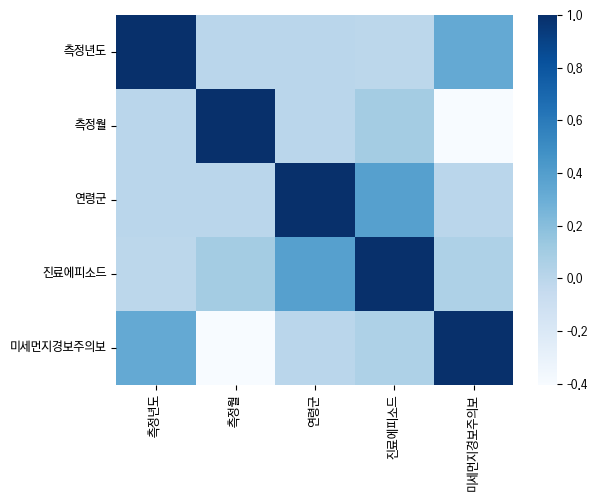

In [16]:
#코로나 시기 제외한 상관관계
pd.set_option('display.width', 170)
# 데이터들을 전부 보기 위해 row, col 생략 없이 출력하도록 하였으며 데이터가 항상 float 형식으로 소수점 이하 6자리까지 출력되도록 하였습니다.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format
df = pd.read_csv("(2016-2019)PM경보주의보.csv",encoding='cp949')
# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)    
plt.rcParams['font.family'] = 'LG PC'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [17]:
cor_target_abs2 = abs(cor['진료에피소드']).sort_values(ascending=False).iloc[1:6]
print(cor_target_abs2)
#cor_target_abs2 = abs(cor['미세먼지경보주의보']).sort_values(ascending=False).iloc[1:6]
#print(cor_target_abs2)

연령군         0.387849
측정월         0.096397
미세먼지경보주의보   0.055014
측정년도        0.003675
Name: 진료에피소드, dtype: float64
